<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [38]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [39]:
import SpecialFunctions
import Plots

In [59]:
using SpecialFunctions
function sample_gaussian(μ,σ,n)
    data = rand(n)
    samples = []
    for i in data
        sample = (erfinv(2 * i - 1) * sqrt(2) * σ) + μ
        push!(samples,sample)
    end
    samples
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [60]:
using Plots, Distributions,SpecialFunctions
samples = sample_gaussian(-1,2,10000)


10000-element Vector{Any}:
  0.37964150872094726
 -2.176763334273838
 -2.1949553401256554
  0.8731389577943791
  0.8780999725786971
 -0.058503842340364764
 -1.8478370233211432
 -1.1642865288884119
 -1.6705473500758483
 -1.3296326563343883
  1.1067636591703156
  0.5800963324535247
 -2.3179964578682695
  ⋮
 -1.6169717395909844
 -3.619920143996447
 -1.358416405664677
 -0.2701949342872296
  1.052815840541999
 -0.8698001704893676
  0.1579414235513359
 -0.8939997440350651
 -3.0649446185384277
 -4.194434502903613
  1.0883425978977361
  0.551418628073252

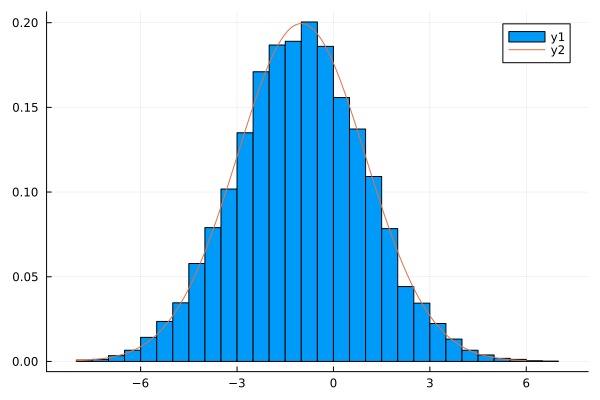

In [61]:
histogram(samples,normalize=true)
x = -8:0.001:6
gaussian = pdf.(Normal(-1,2),x)
plot!(x,gaussian)